# Problem 2

## a) Central Difference Scheme

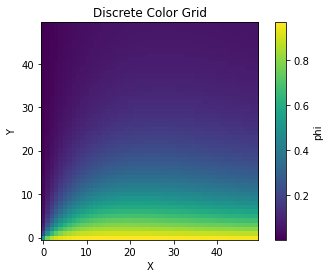

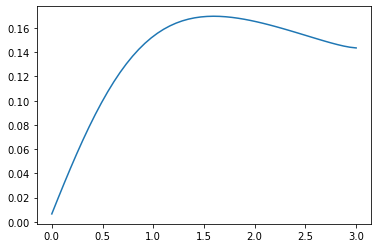

In [4]:
import numpy as np
import matplotlib.pyplot as plt

phi_s = 0.5
rho = 2
l = 3
gamma = 3
n = 50
dx = l/n
dy = l/n

def u(x,y):
    return [x**2+1, y**2+1]

phi_grid = np.zeros((n,n))
A = np.zeros((n**2,n**2))
B = np.zeros((n**2,1))

for i in range(n):
    for j in range(n):
        row = n * i + j

        x,y = j*l/n+dx/2, i*l/n+dy/2
        De, Dw, Dn, Ds = gamma * dy/dx, gamma * dy/dx, gamma * dx/dy, gamma * dx/dy
        Fe, Fw = rho*u(x + dx/2,y)[0]*dy, rho*u(x - dx/2,y)[0]*dy
        Fn, Fs = rho*u(x,y + dy/2)[1]*dx, rho*u(x,y - dy/2)[1]*dx
        Sc = phi_s
        # delV = dx**2
        aE = De - Fe / 2
        aW = Dw + Fw / 2
        aN = Dn - Fn / 2
        aS = Ds + Fs / 2
        b = Sc*dx*dy

        #boundaryconditions
        if i==0:
            #south
            phibc = 1
            b += (2*Ds + Fs) * phibc
            aS = 0
            Fs = 0
            Ds = 2 * Ds

        if j==0:
            # west
            phibc = 0
            b += (2 * Dw + Fw) * phibc
            aW = 0
            Fw = 0
            Dw = 2 * Dw

        if j==n-1:
            #east
            aE = 0
            Fe = 2*Fe
            De = 0

        if i==n-1:
            #north
            aN = 0
            Fn = 2*Fn
            Dn = 0

        aP = (De + Fe / 2) + (Dw - Fw / 2) + (Dn + Fn / 2) + (Ds - Fs / 2)
        A[row,row]+=aP

        if j!=0:
            A[row, row-1] += -aW
        if j!=n-1:
            A[row, row+1] += -aE
        if i!=0:
            A[row,row-n] += -aS
        if i!=n-1:
            A[row, row+n] += -aN

        B[row,0] += b

# phi = np.dot(np.linalg.inv(A), B)
phi = np.linalg.solve(A,B)
# phi = gauss_seidel(A,B)
phi = phi.reshape(n, n)
plt.imshow(phi, interpolation='none', cmap='viridis', origin='lower')
plt.colorbar(label='phi')
plt.title('Discrete Color Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
midsection = phi[n//2,:]
xaxis = np.linspace(0,l,n)
plt.plot(xaxis, midsection)
plt.show()

## b) QUICK Scheme

error = -0.24482303250115342
error = -0.05416697922080915
error = 0.003572534261830269
error = 0.003337964445122963
error = -0.0017450786158532065
error = 0.0002528525668265552
error = 0.0002288600546837502
error = -0.000205150597069748
error = 7.66426593728102e-05


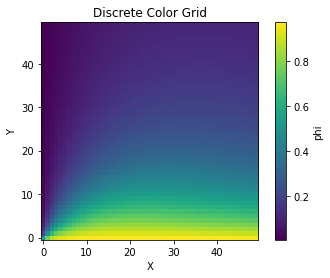

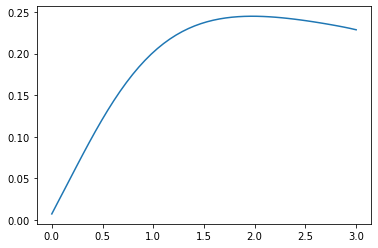

In [5]:
import numpy as np
import matplotlib.pyplot as plt

phi_s = 0.5
rho = 2
l = 3
gamma = 3
n = 50
dx = l/n
dy = l/n

def u(x,y):
    return [x**2+1, y**2+1]

phi = np.zeros((n,n))
tol = 1e-4
err = 10
while np.abs(err) > tol:
    A = np.zeros((n**2,n**2))
    B = np.zeros((n**2,1))
    for i in range(n):
        for j in range(n):
            row = n * i + j

            x,y = j*l/n+dx/2, i*l/n+dy/2
            De, Dw, Dn, Ds = gamma * dy/dx, gamma * dy/dx, gamma * dx/dy, gamma * dx/dy
            Fe, Fw = rho*u(x + dx/2,y)[0]*dy, rho*u(x - dx/2,y)[0]*dy
            Fn, Fs = rho*u(x,y + dy/2)[1]*dx, rho*u(x,y - dy/2)[1]*dx
            Sc = phi_s
            # delV = dx**2
            aE = De + max(-Fe, 0)
            aW = Dw + max(Fw, 0)
            aN = Dn + max(-Fn, 0)
            aS = Ds + max(Fs, 0)

            b = Sc*dx*dy

            #boundaryconditions
            if i==0:
                #south
                phibc = 1
                b += (2*Ds + Fs) * phibc
                aS = 0
                Fs = 0
                Ds = 2 * Ds

            if j==0:
                # west
                phibc = 0
                b += (2 * Dw + Fw) * phibc
                aW = 0
                Fw = 0
                Dw = 2 * Dw

            if j==n-1:
                #east
                aE = 0
                # Fe = 2*Fe
                De = 0

            if i==n-1:
                #north
                aN = 0
                # Fn = 2*Fn
                Dn = 0
            aP = (De + Fe) + (Dw) + (Dn + Fn) + (Ds)
            A[row,row]+=aP
            if j!=0:
                A[row, row-1] += -aW
            if j!=n-1:
                A[row, row+1] += -aE
            if i!=0:
                A[row,row-n] += -aS
            if i!=n-1:
                A[row, row+n] += -aN
            if 1 < i < n - 1 and 1 < j < n - 1:
                del_e = (phi[i][j + 1] - phi[i][j - 1]) / 4 + (phi[i][j + 1] - 2 * phi[i][j] + phi[i][j - 1]) / 8
                del_n = (phi[i + 1][j] - phi[i - 1][j]) / 4 + (phi[i + 1][j] - 2 * phi[i][j] + phi[i - 1][j]) / 8
                del_s = (phi[i][j] - phi[i - 2][j]) / 4 + (phi[i][j] - 2 * phi[i - 1][j] + phi[i - 2][j]) / 8
                del_w = (phi[i][j] - phi[i][j - 2]) / 4 + (phi[i][j] - 2 * phi[i][j - 1] + phi[i][j - 2]) / 8

                b -= ( Fe*del_e + Fw*del_w + Fn*del_n + Fs*del_s)
            B[row,0] += b
    phi_v = np.linalg.solve(A,B)
    err = np.mean(phi - phi_v.reshape(n, n))
    print("error =", err)
    phi = phi_v.reshape(n, n)
    # print(phi)

plt.imshow(phi, interpolation='none', cmap='viridis', origin='lower')
plt.colorbar(label='phi')
plt.title('Discrete Color Grid')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
midsection = phi[n//2,:]
xaxis = np.linspace(0,l,n)
plt.plot(xaxis, midsection)
plt.show()

### The code and results were uploaded in github link https://github.com/Vishwa2003-exe/CFD_assignment_3.git